In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('Major Project-Cleaned Data.csv',index_col=0)
df.head(3)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,2140870789,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,16-07-20
2,1,7646270374,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.0,0.0,UPW,16-08-10
3,1,1794370372,535.0,1398.00,1398.00,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,16-08-19


In [13]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [14]:
corr_features = correlation(df, 0.5)
len(set(corr_features))

12

In [15]:
len(df.columns)-len(corr_features)

24

In [16]:
corr_features

{'amnt_loans30',
 'amnt_loans90',
 'cnt_loans30',
 'cnt_ma_rech90',
 'daily_decr90',
 'medianamnt_loans90',
 'medianamnt_ma_rech30',
 'medianamnt_ma_rech90',
 'payback90',
 'rental90',
 'sumamnt_ma_rech30',
 'sumamnt_ma_rech90'}

In [17]:
df_imp = df.drop(corr_features,axis=1)

In [18]:
df_imp = df_imp.drop(columns=['pcircle','pdate','msisdn'], axis=1)

In [50]:
df_imp.head(2)

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,medianmarechprebal30,...,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,payback30
1,0,272.0,3055.05,220.13,2.0,0.0,1539,2,21.0,7.50,...,7.50,0.0,0.0,0,0,6.0,0.0,2.0,6,29.0
2,1,712.0,12122.00,3691.26,20.0,0.0,5787,1,0.0,61.04,...,61.04,0.0,0.0,0,0,12.0,0.0,1.0,12,0.0


In [51]:
df_imp.columns

Index(['label', 'aon', 'daily_decr30', 'rental30', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'medianmarechprebal30', 'fr_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'maxamnt_loans30',
       'medianamnt_loans30', 'cnt_loans90', 'maxamnt_loans90', 'payback30'],
      dtype='object')

# Input Split and oversampling using SMOTE

In [52]:
X = df_imp.drop(columns=['label'], axis=1)
y = df_imp['label']

In [53]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    166264
1    166264
Name: label, dtype: int64

In [54]:
X_sm.shape, y_sm.shape

((332528, 20), (332528,))

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [56]:
y_train.value_counts()

1    133011
0    133011
Name: label, dtype: int64

In [57]:
print("After Oversampling")
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

After Oversampling
Shape of X_train:  (266022, 20)
Shape of y_train:  (266022,)
Shape of X_test:  (66506, 20)
Shape of y_test:  (66506,)


# Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
model = DecisionTreeClassifier(criterion="gini")

In [60]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
y_pred = model.predict(X_test)

In [62]:
model.score(X_test,y_test)

0.8965206146813821

89 % is great

In [63]:
model.predict_proba(X_test)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     33253
           1       0.90      0.89      0.90     33253

    accuracy                           0.90     66506
   macro avg       0.90      0.90      0.90     66506
weighted avg       0.90      0.90      0.90     66506



In [71]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[30154  3099]
 [ 3783 29470]]


Text(69.0, 0.5, 'Truth')

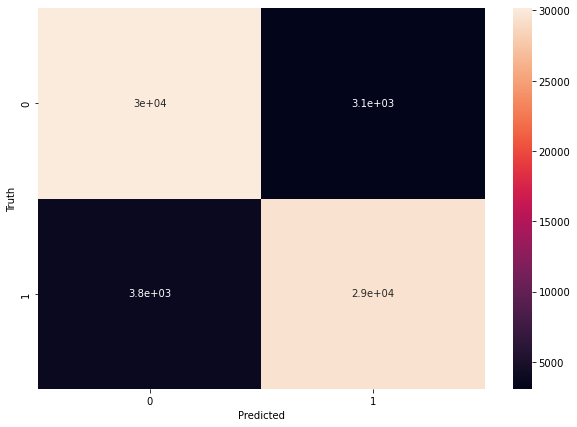

In [72]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Prediction using inputs

In [73]:
input_data = (166,72,19,175,25.8,0.587,51,45,82,
             66,78,25,36,20,47,58,69,45,78,98)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The label is 0: The customer will not payback in 5 days')
else:
  print('The label is 1: The customer will payback in 5 days ')

[1]
The label is 1: The customer will payback in 5 days 


# Save the file

In [74]:
import pickle

In [75]:
filename = 'trained_model.sav'

In [76]:
#saving model
pickle.dump(model, open(filename, 'wb'))

In [77]:
# loading the saved model
loaded_model = pickle.load (open(filename, 'rb'))

In [78]:
loaded_model.score(X_test, y_test)

0.8965206146813821

Checking the loaded model(pickle) file

In [79]:
input_data = (166,72,19,175,25.8,0.587,51,45,82,
             66,78,25,36,20,47,58,69,45,78,98)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The label is 0: The customer will not payback in 5 days')
else:
  print('The label is 1: The customer will payback in 5 days ')

[1]
The label is 1: The customer will payback in 5 days 


# Bussiness Recomendation

### We will find the top 5 most important columns in our data set which affects our outcome and would give bussiness recomendation to work on them.

In [80]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.41470406, 0.21189646, 0.08723904, 0.40249691, 0.01397536,
       0.16541856, 0.17520828, 0.29944163, 0.28926636, 0.07652275,
       0.29819371, 0.0086827 , 0.00238926, 0.00256807, 0.00175226,
       0.05361836, 0.03696491, 0.29085048, 0.07101687, 0.22407645])

In [81]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

aon                     0.414704
last_rech_date_ma       0.402497
fr_ma_rech30            0.299442
medianmarechprebal90    0.298194
cnt_loans90             0.290850
medianmarechprebal30    0.289266
payback30               0.224076
daily_decr30            0.211896
cnt_ma_rech30           0.175208
last_rech_amt_ma        0.165419
rental30                0.087239
fr_ma_rech90            0.076523
maxamnt_loans90         0.071017
maxamnt_loans30         0.053618
medianamnt_loans30      0.036965
last_rech_date_da       0.013975
cnt_da_rech30           0.008683
cnt_da_rech90           0.002568
fr_da_rech30            0.002389
fr_da_rech90            0.001752
dtype: float64

<AxesSubplot:>

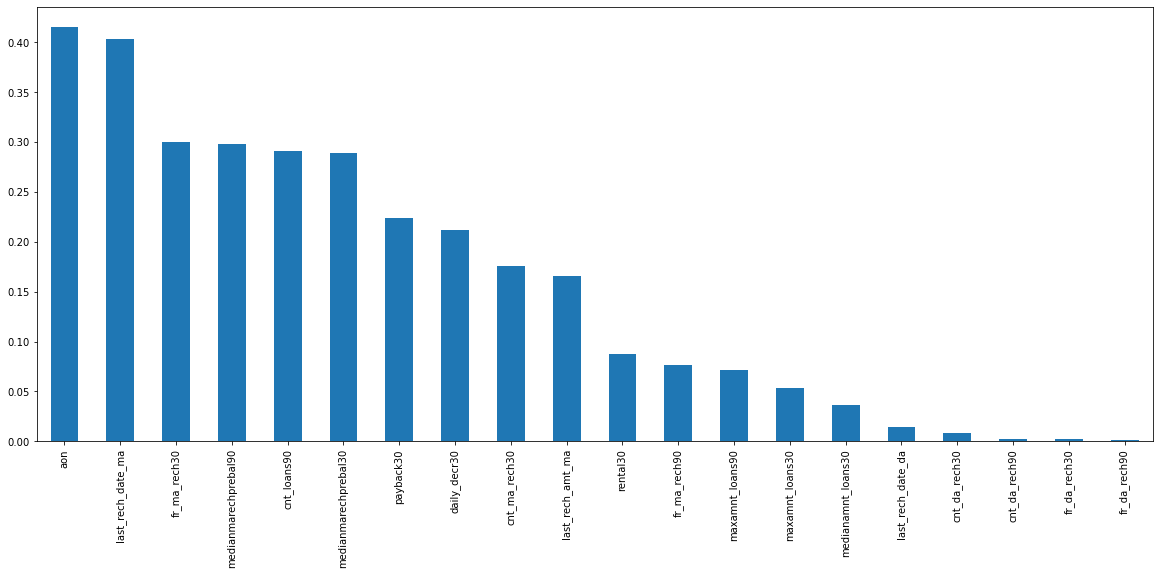

In [82]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [83]:
from sklearn.feature_selection import SelectKBest

In [84]:
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['aon', 'last_rech_date_ma', 'fr_ma_rech30', 'medianmarechprebal90',
       'cnt_loans90'],
      dtype='object')

Top 5 important features is found, now the company will focus more on them.